![mat_task02.jpg](https://raw.githubusercontent.com/StevenZhou5/CuteCode/master/%E5%A5%87%E5%A5%87%E6%80%AA%E6%80%AA%E7%9A%84%E4%BB%A3%E7%A0%81/figofmd/mat_task02.jpg)



### 一、概述

#### 1.1 matplotlib的三层api

　　**绘画器：**画板，图像在画板之上，matplotlib.backend_bases.FigureCanvas
   
　　**渲染器：**画笔，matplotlib.backend_bases.Renderer
   
　　**图表组件：**图像组件，图形，文本，线条的设定 matplotlib.artist.Artist
  

#### 1.3 matplotlib标准用法


　　1.画板，创建一个figure实例
   
　　2.画布，创建subplot或者axes
   
　　3.画图，利用axes实例的辅助方法
  

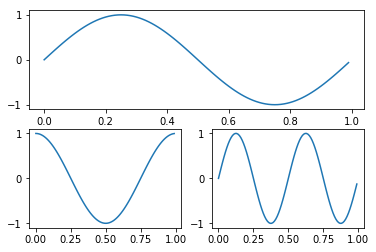

In [70]:
#
import matplotlib.pyplot as plt
import numpy as np


# step1 
fig = plt.figure()


# step2 

ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,2,3)
ax3 = plt.subplot(2,2,4)


# step3 
x = np.arange(0,1,0.01)
y1 = np.sin(2*np.pi*x)
y2 = np.cos(2*np.pi*x)
y3 = np.sin(4*np.pi*x)
ax1.plot(x,y1)
ax2.plot(x,y2)
ax3.plot(x,y3)

plt.show()

### 一、自定义Artist对象

**什么叫做Artist对象**

Artist包括两种对象：**1、基本要素primitives 和 2、容器 containers**

* **基本要素**—简单的artist对象就是标准的绘图元件，例如**线条Line2D，矩形框Rectangle，文本Text，AxesImage**，


* **容器**—简单的Artist对象组成的**Figure，Axes，Axis**，因此可以通过设置这些对象的属性设置容器类型。

我们可以通过设置这些Artist对象的属性，来改变我们绘制图像的 *透明度，大小*等等一系列其他的特征

#### 1.1 Artist 属性

   已知的artist对象参照[官方文档](https://matplotlib.org/tutorials/intermediate/artists.html#customizing-your-objects)


| 属性| 描述 |
|---- | ---|
|alpha|背景透明度 0-1|
|animated|布尔值，用于促进动画绘制？|
|axes|拥有此Artist对象的Axes对象，可能为None|
|clip_box|对象的裁剪框|
|clip_on|是否裁剪|
|clip_path|裁剪的路径|
|figure|拥有此对象的figure对象，可能为None|
|label|文本标签|
|picker|控制Artist对象选取|
|transform|控制偏移、旋转、缩放等坐标变换|
|visible|控制是否可见|

需要实际例子来理解Artist属性的设置

**利用Artist对象进行绘图的流程分为以下步骤** [参考文档](https://blog.csdn.net/JavaMoo/article/details/78382857)

* 1.创建Figure对象
* 2.为Figure对象创建一个或多个Axes对象
* 3.调用Axes对象的方法来创建各种简单的Artist对象


Artist对象的获取和设置 都通过**get_xx 和 set_xx**来实现

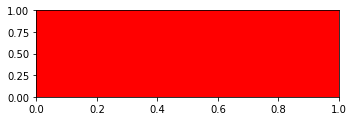

In [23]:
# 创建Figure对象
fig = plt.figure()


# 为Figure对象创建Axes对象
ax = fig.add_axes([0.15, 0.1, 0.7, 0.3])

# 设置Axes的属性
ax.patch.set_color('r')
#ax.plot([1,2,3],[4,5,6])


plt.show()

In [26]:
# 一次设置多个属性，也可以用set的方法

fig.set(alpha=0.5,zorder=2)

[None, None]

### 二、Artist中的基本元素

第一节提到了Artist包括两种对象，第一种是基本元素Primitives，指的是**曲线Line2D，文本text，矩形Rectangle，图像image**

下面我们来学习如果获取和设置基本元素的属性。

#### 2.1 曲线2DLines

Lines的构造函数：

>class matplotlib.lines.Line2D(xdata, ydata, linewidth=None, linestyle=None, color=None, marker=None, markersize=None, markeredgewidth=None, markeredgecolor=None, markerfacecolor=None, markerfacecoloralt=‘none’, fillstyle=None, antialiased=None, dash_capstyle=None, solid_capstyle=None, dash_joinstyle=None, solid_joinstyle=None, pickradius=5, drawstyle=None, markevery=None, **kwargs)
>  
常用参数有：
> * **xdata:** x轴的数据，默认为range(1，len(ydata+1))
> * **ydata:** y轴的数据坐标
> * **linewidth:** 线条的宽度
> * **color:** 线条的颜色
> * **marker:** 标记的样式，参照[官方文档](https://matplotlib.org/api/markers_api.html#module-matplotlib.markers)
> * **markersize:** 标记的大小
>
其他属性以及属性使用的示例参照官方文档APL[matplotlib.lines.Line2D](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#examples-using-matplotlib-lines-line2d)

线条颜色的使用可以查看官方文档的API[named_color.py](https://matplotlib.org/examples/color/named_colors.html)
[线条风格](https://matplotlib.org/examples/lines_bars_and_markers/linestyles.html)

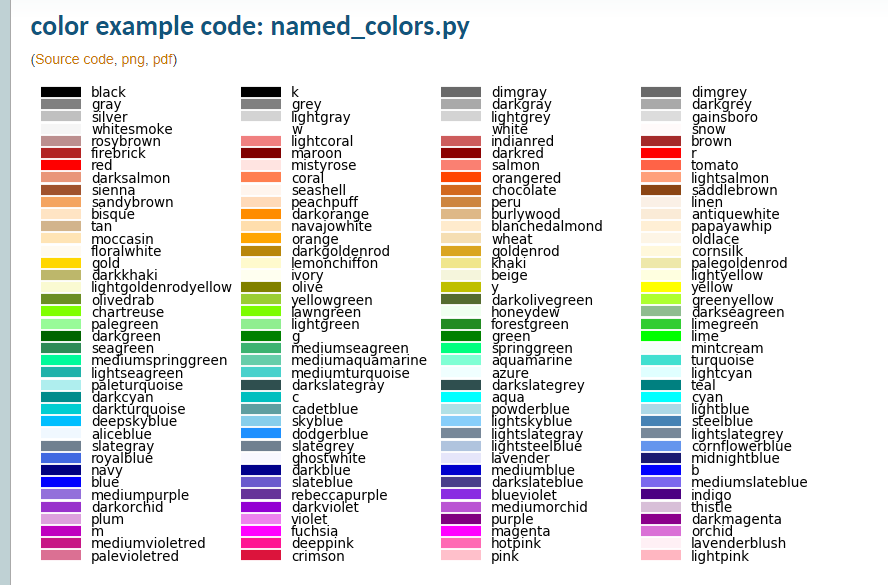

##### 2.1.1 设置2DLines属性

　　
  有三种方法可以设置线的属性：
* 1、直接在plot()函数中设置
* 2、获取线对象，对线对象进行设置
* 3、获取线属性，用setp()函数设置

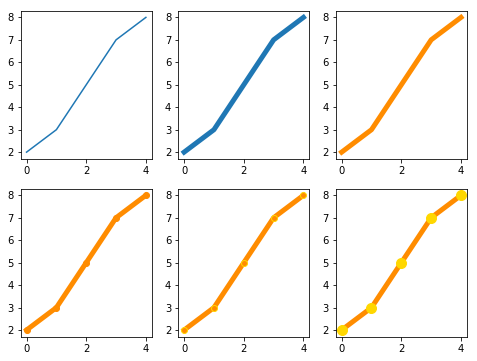

In [75]:
# plot直接设置

x = range(0,5)
y = [2,3,5,7,8]

# 多画几个图对比一下
plt.figure(figsize=(8,6))

ax1 = plt.subplot(231)
ax2 = plt.subplot(232)
ax3 = plt.subplot(233)
ax4 = plt.subplot(234)
ax5 = plt.subplot(235)
ax6 = plt.subplot(236)

#
ax1.plot(x,y)
ax2.plot(x,y,linewidth = 5)
ax3.plot(x,y,linewidth = 5,color='darkorange')
ax4.plot(x,y,linewidth = 5,color='darkorange',marker='o')
ax5.plot(x,y,linewidth = 5,color='darkorange',marker='o',markeredgecolor='gold')
ax6.plot(x,y,linewidth = 5,color='darkorange',marker='o',markeredgecolor='gold',markerfacecolor='gold',markersize = 10)

# plot设置线条的参数可以参照官方示例文档https://matplotlib.org/examples/lines_bars_and_markers/linestyles.html

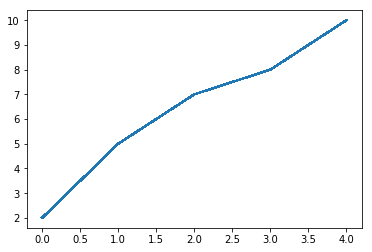

In [106]:
# 获取线对象，对线对象进行设置

x = range(0,5)
y = [2,5,7,8,10]
line,= plt.plot(x, y, '-')



line.set_antialiased(False) # 关闭抗锯齿功能

注：这里有个需要注意的点，plt.plot 返回的是 list of Line2D,如果要使用set_函数，应该是line对象为不是line的列表，所以这里用的line,= plt.plot(x, y, '-')

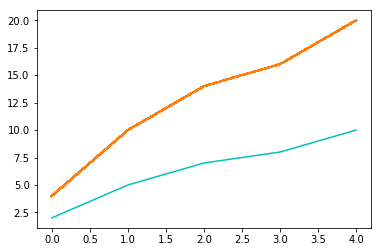

In [114]:
## 同时画两条线，并设置两条线条的属性

x = range(0,5)
y1 = [2,5,7,8,10]
y2 = [i*2 for i in y1]
line= plt.plot(x, y1, '-',x,y2,'-')


line[0].set_color('c')
line[1].set_antialiased(False) # 关闭抗锯齿功能

# 问题：为什么这个图line[1]的线变成了橘色，这段代码并没有设置

[None, None]

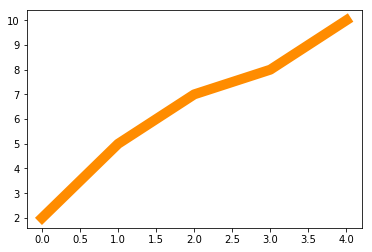

In [112]:
# 获得线属性，使用setp()函数设置

x = range(0,5)
y = [2,5,7,8,10]
lines = plt.plot(x,y)

plt.setp(lines,color = 'darkorange',linewidth=10)

##### 2.1.1 绘制lines

　**a. 绘制直线**

　绘制直线通用的两种方法

* **pyplot方法绘制**
* **Line2D对象绘制**

　目测比较简单常用的方法是直接用pyplot进行绘制


　**b. errorbar绘制误差折线图**

　pyplot包含直接绘制误差线的函数，函数参数如下：

>　**matplotlib.pyplot.errorbar**(x, y, yerr=None, xerr=None, fmt=’’, ecolor=None, elinewidth=None, capsize=None, barsabove=False, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=None, *, data=None, **kwargs)
>
主要参数：
> * **x：** line中点在x轴上的取值
> * **y：** line中点在y轴上的取值
> * **yerr：** 指定y轴水平的误差
> * **xerr：** 指定x轴水平的误差
> * **fmt：** 指定折线图中某个点的颜色，形状，线条风格，例如‘co–’
> * **ecolor：** 指定error bar的颜色
> * **elinewidth：** 指定error bar的线条宽度


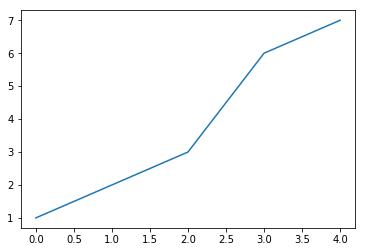

In [117]:
# 直接绘制

plt.plot(range(5),[1,2,3,6,7])

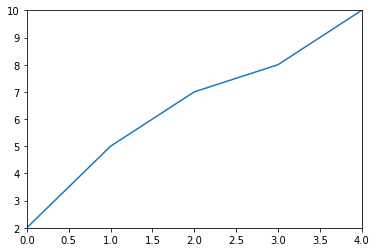

In [122]:
from matplotlib.lines import Line2D  
# 利用Line2D对象

x = range(0,5)
y = [2,5,7,8,10]

#
fig = plt.figure()
ax  = fig.add_subplot(111)

#
line = Line2D(x,y)
ax.add_line(line)
ax.set_xlim(min(x), max(x))
ax.set_ylim(min(y), max(y))
# 
plt.show()

<ErrorbarContainer object of 3 artists>

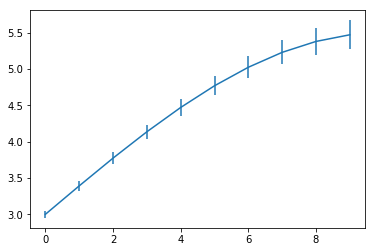

In [124]:
# 误差折线图这一部分没有看，实际没有应用

import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
x = np.arange(10)
y = 2.5 * np.sin(x / 20 * np.pi)

plt.errorbar(x, y + 3, yerr=np.linspace(0.05, 0.2, 10), label='both limits (default)')

#### 2.2 patches


Patches是二维图形类，[构造函数：](https://matplotlib.org/api/_as_gen/matplotlib.patches.Patch.html#matplotlib.patches.Patch)

>**Patch**(edgecolor=None, facecolor=None, color=None,linewidth=None, linestyle=None, antialiased=None,hatch=None, fill=True, capstyle=None,joinstyle=None,**kwargs)
>  
常用参数有：
> * **edgecolor:** 边界颜色
> * **facecolor:** 填充颜色
> * **color:** 整体颜色
> * **linewidth:** 线条宽度
> * **linestyle:** 线条风格
> * **antialiased:** 抗锯齿功能
> * **fill:** 是否填满
其他属性以及属性使用的示例参照官方文档APL[matplotlib.lines.Line2D](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#examples-using-matplotlib-lines-line2d)

Patches是个大类，其子类包括**Rectangle，Polygon，Wedfe**等等，具体可以参照[官方文档](https://matplotlib.org/api/patches_api.html)

##### 2.2.1 Rectangle—矩形

矩形的构造函数：
> **class matplotlib.patches.Rectangle**(xy, width, height, angle=0.0, **kwargs)
> 设置矩形的锚点xy，以及宽度width，高度height

实际中常见的就是，直方图和条状图

**<font color='red'>直方图和柱状图的区别是什么?</font>**

* 直方图展示数据的分布，柱状图比较数据的大小
* 直方图x轴是连续的、柱子不可移动，柱状图是可排序的，柱子可移动


**a.hist-直方图**

直方图的构造函数如下：
>**matplotlib.pyplot.hist**(x,bins=None,range=None, density=None, bottom=None, histtype=‘bar’, align=‘mid’, log=False, color=None, label=None, stacked=False, normed=None)
>  
常用参数详解：  
>*  **x:** 数据集，最终的直方图将对数据集进行统计  
>*  **bins:** 统计的区间分布  
>*  **range:**  tuple, 显示的区间，range在没有给出bins时生效  
>*  **density:**  bool，默认为false，显示的是频数统计结果，为True则显示频率统计结果，这里需要注意，频率统计结果=区间数目/(总数 * 区间宽度)，和normed效果一致，官方推荐使用density  
>*  **histtype:** 可选{‘bar’, ‘barstacked’, ‘step’, ‘stepfilled’}之一，默认为bar，推荐使用默认配置，step使用的是梯状，stepfilled则会对梯状内部进行填充，效果与bar类似    
>*  **align:** 可选{‘left’, ‘mid’, ‘right’}之一，默认为’mid’，控制柱状图的水平分布，left或者right，会有部分空白区域，推荐使用默认
>*  **log:** bool，默认False,即y坐标轴是否选择指数刻度  
>*  **stacked:** bool，默认为False，是否为堆积状图  


直方图的绘制方式有两种：
* 1、直接使用plt.hist函数绘制
* 2、通过plt.Rectangle类绘制

个人习惯第一种画法

Text(0, 0.5, 'count')

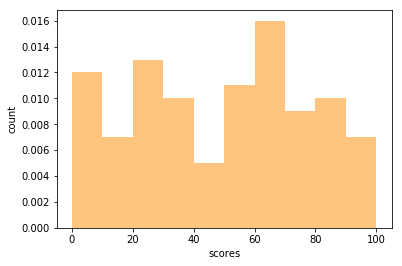

In [137]:
# hist函数绘制直方图

import numpy as np

np.random.seed(2020)
x = np.random.randint(0,100,100)  
bins = range(0,101,10)

#
plt.hist(x,bins = bins,color='darkorange',alpha = 0.5,density=True)

# 
plt.xlabel('scores')
plt.ylabel('count')

In [138]:
# Rectangle矩形类绘制直方图



**b.bar-柱状图**

> **matplotlib.pyplot.bar**(x, height, alpha=1, width=0.8, color=, edgecolor=, label=, lw=3)  
> 
参考参数
> * **x：** x轴的位置数值序列
> * **height：** y的数值序列
> * **alpha：** 透明度
> * **width：** 宽度
> * **color：** 颜色
> * **edgecolor：** 边界颜色
> * **label：** 标签
> * **lw：** linewidth

<BarContainer object of 16 artists>

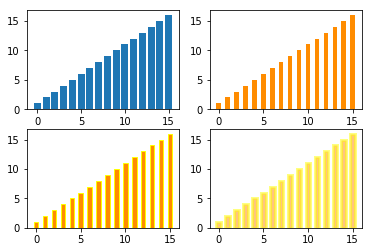

In [145]:
#
x = np.arange(16)
y= np.arange(1,17)

# 
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)


# 
ax1.bar(x,y)
ax2.bar(x,y, width=0.5, color='darkorange',)
ax3.bar(x,y, width=0.5, color='darkorange',edgecolor='yellow')
ax4.bar(x, y, alpha=0.5, width=0.5, color='darkorange', edgecolor='yellow', label='The First Bar', lw=3)

In [ ]:
# Rectangle矩形类绘制柱状图



##### 2.2.2 Polygon—多边形


多边形的构造函数

> class **matplotlib.patches.Polygon**(xy, closed=True, **kwargs)  
>
参数说明  
> **xy:** N*2的 numpy数组，多边形的顶点
> **closed：** True 表示将起点终点闭合 关闭多边形

这里的例子用的plt.fill的函数，没有很理解这个示例，需要补充

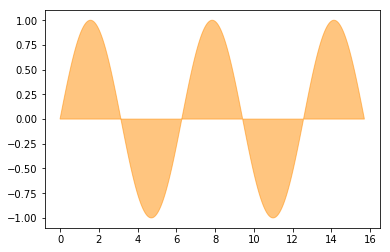

In [148]:
# 

x = np.linspace(0,5*np.pi,1000)
y = np.sin(x)


# 
plt.fill(x,y,color='darkorange',alpha = 0.5)

##### 2.2.3 Wedfe—契形

契形的构造函数：
> class **matplotlib.patches.Wedge** (center, r, theta1, theta2, width=None, **kwargs)   

契形以center为中心，半径为r，从θ1扫到θ2(单位是度)。

通常用来绘制饼状图

> **matplotlib.pyplot.pie**(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=0, 0, frame=False, rotatelabels=False, *, normalize=None, data=None)    
>参数说明：  
> * **x：** 一维数组，每块饼占的比例
> * **explode：**  如果不是等于None，则是一个len(x)数组，它指定用于偏移每个楔形块的半径的分数。
> * **labels：**  用于指定每个契型块的标记，取值是列表或为None。
> * **autopct：** None or str or callable，label的显示方式，如果是字符串，则按照字符串的方式显示出来
> * **color：**  饼图循环使用的颜色序列。如果取值为None，将使用当前活动循环中的颜色。
> * **startangle：** 饼状图开始的绘制的角度。

([<matplotlib.patches.Wedge at 0x2d7bca23d68>,
 [Text(-0.4993895680663527, 0.9801071672559598, 'Frogs'),
  Text(-1.1412677917792124, -0.3708204787324995, 'Hogs'),
  Text(0.9801072140121813, -0.4993894763020948, 'Dogs'),
  Text(0.33991864973549485, 1.0461621822461364, 'Logs')],
 [Text(-0.2723943098543742, 0.5346039094123416, '15.0%'),
  Text(-0.6657395452045406, -0.2163119459272914, '30.0%'),
  Text(0.5346039349157352, -0.27239425980114257, '45.0%'),
  Text(0.1854101725829972, 0.5706339175888016, '10.0%')])

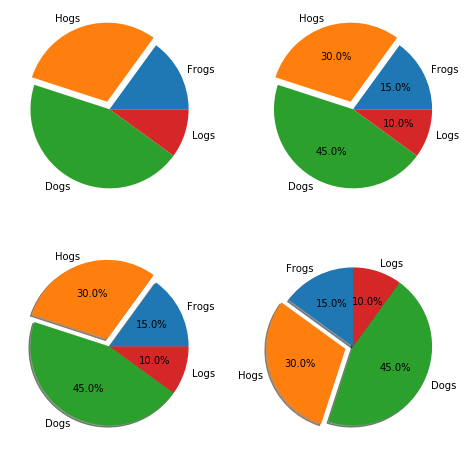

In [152]:
# pie绘制饼状图

#
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10] 
explode = (0, 0.1, 0, 0) 

# 
plt.figure(figsize=(8,8))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)


# 
ax1.pie(sizes, explode=explode, labels=labels)
ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%')
ax3.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)

ax4.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

In [ ]:
# wedge 绘制饼图


#### 2.3 collections

collection类是用来绘制一组对象的集合，常用的就是散点图，
散点图的构造函数如下：

>Axes.scatter(self, x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)  
>  主要参数：
> * **x:**  数据点x轴的位置
> * **y:**  数据点y轴的位置
> * **s:**  尺寸大小
> * **c:**  可以是单个颜色格式的字符串，也可以是一系列颜色
> * **marker:** 标记的类型

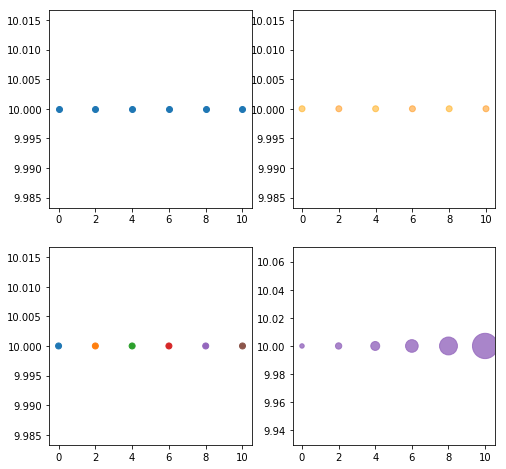

In [164]:
# 绘制散点图

x = [0,2,4,6,8,10] 
y = [10]*len(x) 
s = [20*2**n for n in range(len(x))] 


#
plt.figure(figsize=(8,8))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)

#

ax1.scatter(x,y)
ax2.scatter(x,y,color=['orange', 'darkorange', 'orange', 'darkorange', 'orange', 'darkorange'],alpha=0.5)
ax3.scatter(x,y,c=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])
ax4.scatter(x,y,c='#9467bd', s=s,alpha=0.8) 


#### 2.4 images

matplotlib中绘制image图像的类，最常用的是imshow

构造函数如下：
> matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=, filternorm=1, filterrad=4.0, imlim=, resample=None, url=None, *, data=None, **kwargs）  
> 主要参数：
>
>
>

这里跳过学习

### 三、对象容器 - Object container

对象容器可以理解为由第二节提到的一些简单的 基本元素组成的，在具备基本元素的属性的同时，还具备一些自己独特的属性，

下面开始学习对象容器的属性设定

#### 3.1 Figure容器

matplotlib.figure.Figure是Artist最顶层的container-对象容器，我把它当作画板来理解。

**添加subplot/axes：** 我的理解是添加画纸，使用figure.add_subplot() 或者 Figure.add_axes()，这些会被添加到Figure.axes列表中
**删除axes：** Figure.delaxes()
**修改对象属性：** 通过add primitive语句，


**Figure容器的常见属性：***

Figure.patch属性：Figure的背景矩形
Figure.axes属性：一个Axes实例的列表（包括Subplot)
Figure.images属性：一个FigureImages patch列表
Figure.lines属性：一个Line2D实例的列表（很少使用）
Figure.legends属性：一个Figure Legend实例列表（不同于Axes.legends)
Figure.texts属性：一个Figure Text实例列表

属性的学习空缺，这一部分之后再补充

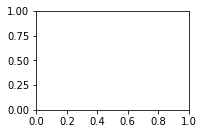

In [188]:
# 添加subplot

fig = plt.figure()


# add_subplot()

ax1 = fig.add_subplot(221)


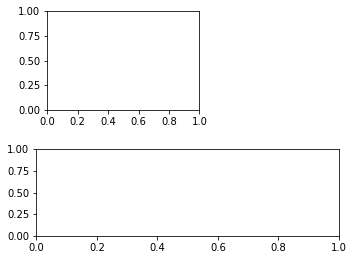

In [189]:
# add_axes
ax2 = fig.add_axes([0.1,0.1,0.7,0.3]) # left,bottom,width,height 他们代表了相对于Figure的坐标

fig   # fig.axes 中包含了subplot和axes两个实例, 刚刚添加的

In [190]:
# delaxes 
for ax in fig.axes:
    fig.delaxes(ax)
fig

<Figure size 432x288 with 0 Axes>

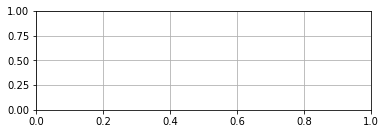

In [191]:
# 遍历添加网格线

fig = plt.figure()
ax1 = fig.add_subplot(211)

for ax in fig.axes:
    ax.grid(True)
    

#### 3.2 Axes容器

matplotlib.axes.Axes是matplotlib的核心。绘图的基本元素都可以添加在Axes上面，同时可以修改基本元素的属性以及Axes容器自己的属性。

当我们创建Axes时，最好的方式时通过.plot()、.text()、.hist()、.imshow()等方法自动化的添加，  
当然也可以通过.add_line()和.add_patch()方法

另外Axes包括两个重要的容器属性：
* ax.xaxis：XAxis对象的实例，用于处理x轴tick以及label的绘制
* ax.yaxis：YAxis对象的实例，用于处理y轴tick以及label的绘制

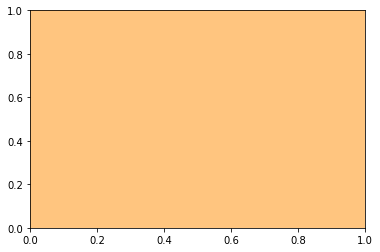

In [194]:
#

fig = plt.figure()
ax = fig.add_subplot(111)


# 

rect = ax.patch  # axes的patch是一个Rectangle实例
rect.set_facecolor('darkorange')
rect.set_alpha(0.5)

#### 3.3 Axis容器

matplotlib.axis.Axis实例处理tick line、grid line、tick label以及axis label的绘制，它包括坐标轴上的**刻度线、刻度label、坐标网格、坐标轴标题**。

每个Axis都有一个label属性，也有主刻度列表和次刻度列表。这些ticks是axis.XTick和axis.YTick实例。

刻度线时动态创建的，Axis中存在一下辅助的方法来获取刻度文本，刻度位置等等。


[-0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5]
<a list of 11 Text major ticklabel objects>
<a list of 22 Line2D ticklines objects>
[0. 4.]
[-0.2  4.2]


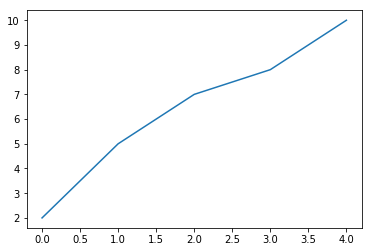

In [197]:


fig, ax = plt.subplots()
x = range(0,5)
y = [2,5,7,8,10]
plt.plot(x, y, '-')

axis = ax.xaxis # axis为X轴对象
print(axis.get_ticklocs()     )# 获取刻度线位置
print(axis.get_ticklabels()   )# 获取刻度label列表(一个Text实例的列表）。 可以通过minor=True|False关键字参数控制输出minor还是major的tick label。
print(axis.get_ticklines()    )# 获取刻度线列表(一个Line2D实例的列表）。 可以通过minor=True|False关键字参数控制输出minor还是major的tick line。
print(axis.get_data_interval())# 获取轴刻度间隔
print(axis.get_view_interval())# 获取轴视角（位置）的间隔

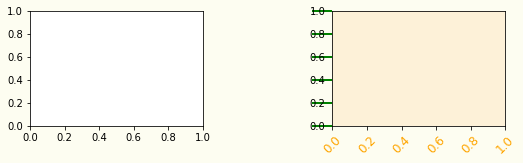

In [219]:
fig = plt.figure() # 创建一个新图表
rect = fig.patch   # 矩形实例并将其设为黄色
rect.set_facecolor('lightgoldenrodyellow')
rect.set_alpha(0.3)

ax1 = fig.add_axes([0.1, 0.3, 0.4, 0.4])
ax2 = fig.add_axes([0.8, 0.3, 0.4, 0.4])

#
rect = ax2.patch   # ax1的矩形设为灰色
rect.set_facecolor('darkorange')
rect.set_alpha(0.1)



for label in ax2.xaxis.get_ticklabels(): 
    # 调用x轴刻度标签实例，是一个text实例
    label.set_color('orange') # 颜色
    label.set_rotation(45) # 旋转角度
    label.set_fontsize(12) # 字体大小
    
    
for line in ax2.yaxis.get_ticklines():
    # 调用y轴刻度线条实例, 是一个Line2D实例
    line.set_color('green')    # 颜色
    line.set_markersize(20)    # marker大小
    line.set_markeredgewidth(2)# marker粗细

#### 3.4 Tick容器

matplotlib.axis.Tick是从Figure到Axes到Axis到Tick中最末端的容器对象。  
Tick包含了**刻度tick、网格grid，曲线line**实例以及对应的label。

所有的这些都可以通过Tick的属性获取，常见的tick属性有 
* Tick.tick1line：Line2D实例 
* Tick.tick2line：Line2D实例 
* Tick.gridline：Line2D实例 
* Tick.label1：Text实例 
* Tick.label2：Text实例 

y轴分为左右两个，因此tick1对应左侧的轴；tick2对应右侧的轴。  
x轴分为上下两个，因此tick1对应下侧的轴；tick2对应上侧的轴。

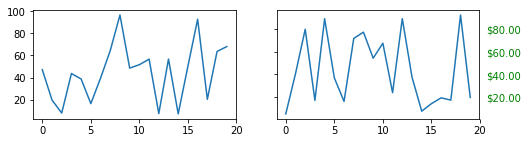

In [238]:
#
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

#


fig = plt.figure(figsize=(8,2))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(100*np.random.rand(20))
ax2.plot(100*np.random.rand(20))




# 设置ticker的显示格式
formatter = matplotlib.ticker.FormatStrFormatter('$%1.2f')
ax2.yaxis.set_major_formatter(formatter)


# 设置ticker的参数，右侧为主轴，颜色为绿色
ax2.yaxis.set_tick_params(which='major', labelcolor='green',
                         labelleft=False, labelright=True)




#### 思考题

**1、primitives 和 container的区别和联系是什么？**
* 联系：primitives 和 container都是matplotlib中的Artist对象、
* 区别：primitives指的时一些基本的元素，相当于构成图形的简单的点线这些，而container是在基本元素的基础上，由基本元素组成的 正方体，圆柱体这些几何体，在具备基本元素的属性的同时，还具备自己独特的基本属性

2、四个容器的联系和区别是么？他们分别控制一张图表的哪些要素？

* 联系：四个容器相当于一种包含关系，figure最顶层,接着是Axes，Aixs和Tick，没有建立Figure，Axes就不存在，往下一样
* 区别：四个容器构成的基本元素不同，属性也不同

#### 绘图题

1、教程中展示的案例都是单一图，请自行创建数据，画出包含6个子图的线图，要求：
子图排布是 2 * 3 （2行 3列）； (已实现)
线图可用教程中line2D方法绘制；
需要设置每个子图的横坐标和纵坐标刻度；
并设置整个图的标题，横坐标名称，以及纵坐标名称

Text(0.5, 0.98, '大标题')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D7C1AB6DA0>,
      dtype=object)

D:\app2\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


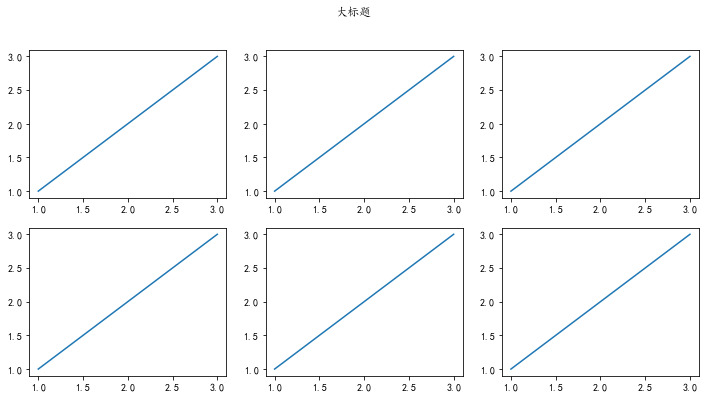

In [257]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams['font.sans-serif'] = ['KaiTi'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

#
fig = plt.figure(figsize=(12,6))
fig.suptitle('大标题')
fig.subplots(2,3)


for ax in fig.axes:
    ax.plot([1,2,3],[1,2,3])
    

    
fig.show()

2、分别用一组长方形柱和填充面积的方式模仿画出下图，函数 y = -1 * (x - 2) * (x - 8) +10 在区间[2,9]的积分面积

<BarContainer object of 50 artists>

<BarContainer object of 50 artists>

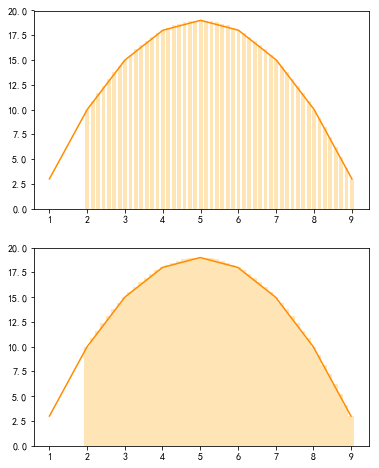

In [298]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)


x = np.arange(1,10)
x1 = np.arange(2,9)
x2 = np.linspace(2,9,50)
y = -1 * (x - 2) * (x - 8) +10
y1 = -1 * (x1 - 2) * (x1 - 8) +10
y2 = -1 * (x2 - 2) * (x2 - 8) +10

#

ax1.plot(x,y,color='darkorange')
ax1.bar(x2,y2,width=0.1,color='moccasin')

#
ax2.plot(x,y,color='darkorange')
ax2.bar(x2,y2,width=0.15,color='moccasin')